### Word Embedding and Clustering
@Jyontika Kapoor

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

## Week 7 Task Slide 15

In [10]:
import csv
import json


def read_csv(file_path):
    data = []
    with open(file_path, 'r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(row)
    return data




In [24]:
following_data = read_csv("follow_data_74721.csv") #my data
following = values = [d['lochan.k'] for d in following_data]
following

['r.ohini',
 '20amuller',
 'thefurnituredoctor',
 'ryanisreallypolite',
 'cnovello13',
 'millymillyrockz',
 'lilchikiszat',
 'karinaaarose',
 'misssmaiah',
 'alexamichela',
 'urvikap97',
 'ayanna_moise',
 'nasirwynruit',
 'jvmes.music',
 'peaceluvcourt',
 'ruiepooie',
 'xo.zen',
 'eeshkapeesh999',
 'superkeara',
 'selenagomez',
 'karissalauren',
 'phillyfoodies',
 'itzelt.reyes',
 'shruthisundar01',
 'imogenieinabottle',
 'ripberniemadoff',
 'sslizzle',
 'alex.ndratx',
 'srimyla',
 'alakeyeah',
 'sachitanwar6',
 'thewellesleynews',
 'gshell08',
 'oliviaholtzinger10',
 'mkennedy28',
 'box_of_olives',
 'cosyeet',
 'sophferrante',
 'jassaco_xo',
 'zoralikedora',
 'planetmargs',
 'erictran42',
 'bhadminton',
 'whiteboyofthemonth69',
 'papayasguy',
 'kenzie461',
 'sophdog03',
 'ellie.bk',
 'evanpalmblad',
 'rosedg18',
 'averyhirschofficial',
 'nationltreasure',
 'liesel.liesel',
 'ash.reeeee',
 'sarahcatherinne_',
 'shirtsbylena',
 'igobyadi',
 'jamsino',
 'krithi.com',
 'uhavesy0',
 'zockj

In [13]:
news = read_csv("/Users/jyontika/Documents/GitHub/CS-315-JK/news-accounts.csv")

In [26]:
news_list = [d['Username'] for d in news if 'Username' in d]
news_list

['nytimes',
 'washingtonpost',
 'cnn',
 'pbsnews',
 'abcnews',
 'msnbc',
 'cbsnews',
 'briantylercohen',
 'cbseveningnews',
 'abcworldnews',
 'nbcnews',
 'yahoonews',
 '7newsq',
 '',
 'skynews',
 'bbc',
 'forbes',
 'usatoday',
 'gbnews',
 'varietymagazine',
 'sophiasmithgaler',
 'maxfostercnn',
 'nytopinion',
 '60minutes',
 'cbsmornings',
 'cbssundaymorning',
 'vicenews',
 'abcnewslive',
 'gma',
 'newsweek',
 'underthedesknews',
 'theconversation',
 'nowthisimpact ',
 'dailymail',
 'davebondy',
 'aljazeeraenglish',
 'vicenewsdocs',
 'c4news',
 'itvnews',
 'niickjackson',
 'abc7la',
 'reuters',
 'npr',
 'nowthis',
 'brutamerica',
 'thetelegraph',
 'vox',
 'buzzfeednews',
 'taylorlorenz',
 'wallstreetjournal',
 'latimes',
 'natgeo',
 'vicderbyshire',
 'pinknews',
 'eveningstandard',
 'cleoabram',
 'sandragathmann',
 'tldrnews',
 'morningbrew',
 'semafor',
 'thepocketreport',
 'theeconomist',
 'thegarbagequeen',
 'nbcnightlynews',
 'benjaminzamoratven',
 'thenewsmovement',
 'elliecolts',


In [27]:
overlap = set(news_list) & set(following)

print("Usernames followed by both the news accounts and the user:")
print(overlap)

Usernames followed by both the news accounts and the user:
{'thewellesleynews'}


### Word Embedding

In [2]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [3]:
# get the word embedding of a single word, will be 512
embed(["apple"])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[-0.04391911,  0.03201129,  0.01190968,  0.03629499, -0.00428854,
        -0.04623365,  0.01953796, -0.0766146 , -0.04304637,  0.03870976,
        -0.04847969, -0.05598783, -0.07318962, -0.01257844, -0.0890022 ,
         0.03608386, -0.03099002, -0.03288193,  0.02245504, -0.07364368,
        -0.0434471 ,  0.01525586, -0.01991094, -0.00087345, -0.02389862,
         0.08860014,  0.0060273 , -0.04430725,  0.04500025, -0.01356371,
        -0.04075946, -0.0187194 , -0.01410533,  0.01902027, -0.07315564,
         0.0389857 , -0.0508206 ,  0.01163179,  0.01045336, -0.01495852,
         0.05237337, -0.02879028, -0.0653019 , -0.02734276,  0.00342716,
         0.07910772, -0.00500462,  0.00479221, -0.00226164, -0.03844388,
        -0.02335554, -0.0037697 ,  0.08060665,  0.07994738, -0.07976855,
        -0.08015753,  0.05998328,  0.02709491,  0.07591494,  0.01611827,
        -0.03375888, -0.02939119,  0.05382704,  0.0583757 ,  0.02365989,
 

In [6]:
words = ['king', 'queen', 'radio', 'TV', 'bike', 'car', 'Boston', 'London', 'lake', 'river']

embeddings = embed(words)
embeddings #should be 10,512
embeddings.shape


TensorShape([10, 512])

In [26]:
##Now we can calculate cosine similarity between these words

from numpy.linalg import norm

def cosineSimilarity(vector1,vector2):
    V1 = np.array(vector1) #would need to use .flatten() if just using one word?
    V2 = np.array(vector2)
    cosine = np.dot(V1,V2) / (norm(V1) * norm(V2))
    return cosine

In [27]:
def pairwiseSimilarity(embeddings):
    """Given matrix embeddings, calculate cosine similarity for each pair"""
    simMatrix = []
    for vector1 in embeddings:
        simRow = []
        for vector2 in embeddings:
            simRow.append(cosineSimilarity(vector1,vector2))
        simMatrix.append(simRow)
    
    return simMatrix #simMatrix is a list of lists


In [33]:
simMatrix = pairwiseSimilarity(embeddings)
len(simMatrix) #number of rows 

10

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

def drawHeatmap(labels, simMtrx, plotTitle):
    """Draws a heatmap for the similarity matrix.
    """
    sns.set_theme(font_scale=0.9)
    g = sns.heatmap(
          simMtrx, # similarity matrix with the cosine sim values
          xticklabels=labels,
          yticklabels=labels,
          vmin=0,
          vmax=1,
          cmap="coolwarm")
    g.set_xticklabels(labels, rotation=90)
    g.set_title(plotTitle, fontsize=14)
    plt.show()

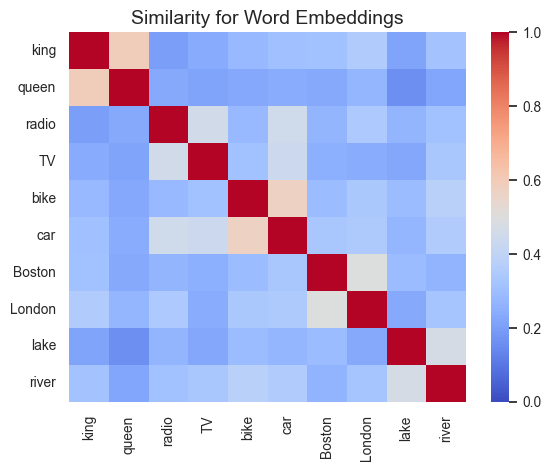

In [39]:
drawHeatmap(words, simMatrix, "Similarity for Word Embeddings")

In [55]:
## optional challenge: find the most similar words
## want to create a function to find the most similar pairs


def findTopPairs(simMatrix, words):
    """Given a matrix, find the most similar pairs of words
    
    simMatrix (list of lists) - computed using cosine similarity
    words (list) - list of words corresponding to rows and columns of simMatrix
   
    Returns a list of tuples 
    """

    top_pairs = []

    for word1 in range(len(words)): 
        for word2 in range(word1+1, len(words)): 
            similarity = simMatrix[word1][word2] #calculates similarity 
            word_pair = (words[word1], words[word2])
            top_pairs.append((similarity, word_pair))


    top_pairs = sorted(top_pairs, reverse=True)

    return top_pairs

    
    

In [56]:
findTopPairs(simMatrix, words)[:10]

[(0.5885695, ('king', 'queen')),
 (0.5698406, ('bike', 'car')),
 (0.49752557, ('Boston', 'London')),
 (0.4717121, ('lake', 'river')),
 (0.45328125, ('radio', 'TV')),
 (0.4517104, ('radio', 'car')),
 (0.4353165, ('TV', 'car')),
 (0.3785725, ('bike', 'river')),
 (0.35194835, ('king', 'London')),
 (0.35168734, ('car', 'river'))]

### K-means clustering

In [57]:
import json

In [65]:
news = json.load(open('news-hashtags.json'))
news[:5]

129

In [66]:
len(news)

129

In [68]:
newsEmbed = embed(news) 
newsEmbed.shape #should be 129,512

TensorShape([129, 512])

In [73]:
from sklearn.cluster import KMeans

k=15
kmeans = KMeans(n_clusters=k, random_state=42)

In [74]:
clusters = kmeans.fit_predict(newsEmbed) #using KMeans clustering to fit the model to the news hashtags and predict cluster labels for each data point 


In [77]:
clusters #array with cluster indies. this array tells us which of the k=15 clusters the item has been assigned 

array([12, 11,  3, 10, 11, 10,  1,  6, 12,  6,  3,  5,  6,  6,  3,  5,  6,
        3,  1, 12, 13,  1,  8,  1, 10,  2,  3,  6, 10,  6, 10,  4,  8,  3,
        3, 13,  4,  6,  2,  2,  9,  3,  3, 13,  3,  6,  4, 13,  0,  4,  1,
        2,  2,  2, 13,  8,  3, 12,  1, 12, 14,  5,  4, 12,  1,  5,  1,  3,
        3,  4,  6,  3,  2,  2,  5, 14,  7, 10,  2,  3,  3,  3, 10,  3, 12,
       12,  2,  1, 10,  2,  2, 12, 12,  8,  3,  3,  9, 12, 13, 10,  9,  6,
        5,  5,  3, 10,  3,  3,  1,  4,  2,  9, 12,  1,  2,  4, 10,  9,  2,
       10,  9,  3,  1,  3, 12,  9,  2,  4, 12], dtype=int32)

In [86]:
for cl in range(k):
    cluster_words = [news[i] for i in range(len(news)) if clusters[i]==cl]
    print(f"Cluster {cl} has {len(cluster_words)} words: {cluster_words}")

Cluster 0 has 1 words: ['michigan']
Cluster 1 has 12 words: ['historytok', 'topstories', 'inflation', 'uselections', 'politicaltiktok', 'usaelections', 'newsattiktok', 'uspolitics', 'stateoftheunion', '2024debate', 'noticiastiktok', '2024breakingnews']
Cluster 2 has 16 words: ['viralnews', '2024president', 'technews', 'newstiktok', 'trumptrial', 'learnontiktok', 'supertuesday', 'новости', 'trump2024', 'climategoals', 'governmentshutdown', 'trumprally', 'currentnews', 'noticiasen1minuto', 'breakingnewsalert', 'citizentvkenya']
Cluster 3 has 25 words: ['breakingnews', 'militarynews ', 'currentevents', 'supremecourt', 'covid', 'internationalnews ', 'unitednations', 'joebiden', 'breaking', 'FederalReserve', 'newsafrica', 'goodnews', '参議院', 'bordercrisis', 'tiktokでニュース', 'crimetok', 'أخبار', '新闻', 'trendingnews', 'chinesepolitics', 'uknews', 'aktualności', 'reproductiverights', 'localnews', 'elections2022🇰🇪']
Cluster 4 has 9 words: ['quicknews', 'kenyanews', 'healthnews', 'election2024', 'n